Imports

In [ ]:
import cv2
import numpy as np

Drive mounting

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: 

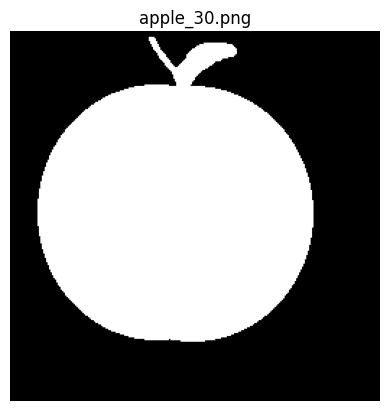

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = "/content/apple.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Display the image
plt.imshow(image, cmap='gray')
plt.title('apple_30.png')
plt.axis('off')  # Hide axes
plt.show()


Développement formules simples

1. Géom

In [ ]:
# Load image (grayscale)
image = cv2.imread('/content/apple.png', cv2.IMREAD_GRAYSCALE)

# Apply a binary threshold
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)


def geometric_sum(image, p, q):
    y, x = np.mgrid[:image.shape[0], :image.shape[1]]
    return (x**p * y**q * image).sum()

# Example: m00, m10, m01
m00 = geometric_sum(binary_image, 0, 0)
m10 = geometric_sum(binary_image, 1, 0)
m01 = geometric_sum(binary_image, 0, 1)


print(m00,m10,m01)

7211145 824321160 883577040


2. Barycentre (rapports : moments nu) basés sur moments géomètriques

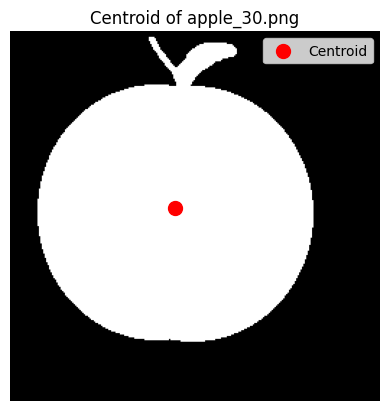

Barycenter coordinates: (114, 122)


In [ ]:
# Calculate moments of the image
moments = cv2.moments(image)

# Calculate the barycenter (centroid)
 def compute_barycenter(m00, m01, m10)
  if moments['m00'] != 0:
      x_centroid = int(m10 / m00)
      y_centroid = int(m01 / m00)
  else:
      x_centroid, y_centroid = 0, 0  # To handle cases where m00 is zero (e.g., completely black image)
    return x_centroid ,y_centroid

# Plot the image and its centroid
plt.imshow(image, cmap='gray')
plt.scatter([x_centroid], [y_centroid], color='red', label='Centroid', s=100)
plt.title('Centroid of apple_30.png')
plt.legend()
plt.axis('off')  # Hide axes
plt.show()

print(f"Barycenter coordinates: ({x_centroid}, {y_centroid})")


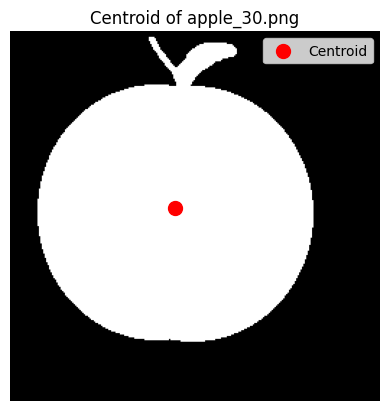

Barycenter coordinates: (114, 122)


In [ ]:
# Calculate moments of the image

image2 = cv2.imread('/content/apple_t_1515 (1).png', cv2.IMREAD_GRAYSCALE)

moments = cv2.moments(image2)

# Calculate the barycenter (centroid)
if moments['m00'] != 0:
    x_centroid = int(m10 / m00)
    y_centroid = int(m01 / m00 )
else:
    x_centroid, y_centroid = 0, 0  # To handle cases where m00 is zero (e.g., completely black image)

# Plot the image and its centroid
plt.imshow(image, cmap='gray')
plt.scatter([x_centroid], [y_centroid], color='red', label='Centroid', s=100)
plt.title('Centroid of apple_30.png')
plt.legend()
plt.axis('off')  # Hide axes
plt.show()

print(f"Barycenter coordinates: ({x_centroid}, {y_centroid})")


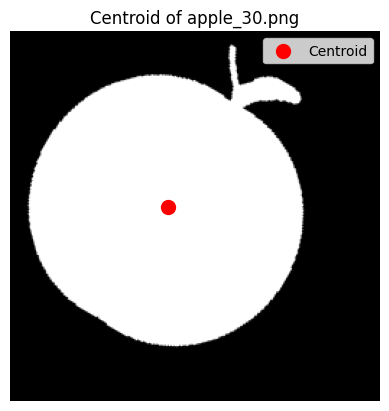

Barycenter coordinates: (109, 121)


In [ ]:
# Calculate moments of the image

image3 = cv2.imread('/content/apple_30rotation.png', cv2.IMREAD_GRAYSCALE)

# Example: m00, m10, m01
m00 = geometric_sum(image3, 0, 0)
m10 = geometric_sum(image3, 1, 0)
m01 = geometric_sum(image3, 0, 1)

# moments = cv2.moments(image2)

# Calculate the barycenter (centroid)
if moments['m00'] != 0:
    x_centroid = int(m10 / m00)
    y_centroid = int(m01 / m00 )
else:
    x_centroid, y_centroid = 0, 0  # To handle cases where m00 is zero (e.g., completely black image)

# Plot the image and its centroid
plt.imshow(image3, cmap='gray')
plt.scatter([x_centroid], [y_centroid], color='red', label='Centroid', s=100)
plt.title('Centroid of apple_30.png')
plt.legend()
plt.axis('off')  # Hide axes
plt.show()

print(f"Barycenter coordinates: ({x_centroid}, {y_centroid})")


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


3. Moments centrés (translation)

In [65]:
import numpy as np
import cv2

def calculer_moments_geometriques(image):
    moments = {}
    hauteur, largeur = image.shape

    # Convertir l'image en type float64 pour éviter les débordements
    image_float = image.astype(np.float64)

    # Calcul des moments géométriques
    for p in range(4):
        for q in range(4):
            M_pq = 0.0
            for y in range(hauteur):
                for x in range(largeur):
                    M_pq += (x ** p) * (y ** q) * image_float[y, x]
            moments[(p, q)] = M_pq
    return moments

# Exemple d'utilisation
image = cv2.imread('/content/apple_30rotation.png', cv2.IMREAD_GRAYSCALE)
moments = calculer_moments_geometriques(image)
print("Moments géométriques :", moments)


Moments géométriques : {(0, 0): 7211300.0, (0, 1): 875049275.0, (0, 2): 122642517777.0, (0, 3): 18866067611753.0, (1, 0): 787879636.0, (1, 1): 95399830460.0, (1, 2): 13412393949910.0, (1, 3): 2072022106208768.0, (2, 0): 102652807758.0, (2, 1): 12378277001082.0, (2, 2): 1730509451242120.0, (2, 3): 2.654937927085497e+17, (3, 0): 14809422907978.0, (3, 1): 1777012952786630.0, (3, 2): 2.462912079272874e+17, (3, 3): 3.737849715495273e+19}


4. Dév. moments normalisés (d'échelle) alpha (?)

In [49]:
def calculer_barycentre(moments):
    M00 = moments[(0, 0)]
    M10 = moments[(1, 0)]
    M01 = moments[(0, 1)]

    # Calcul du barycentre
    x_centre = M10 / M00
    y_centre = M01 / M00
    return (x_centre, y_centre)

# Exemple d'utilisation
centroide = calculer_barycentre(moments)
print("Barycentre :", centroide)


Barycentre : (109.25625559885181, 121.3441785808384)


5. Faire des translation aux ceux derniers

Moments centrés : {(0, 0): 7211300.0, (0, 1): -6.440577226385358e-05, (0, 2): 16460382284.366835, (0, 3): -10631101829.05174, (1, 0): -5.663290778556984e-07, (1, 1): -204776790.98995954, (1, 2): 62628623369.55607, (1, 3): -2967003413733.8867, (2, 0): 16572028866.053823, (2, 1): -33297344495.00139, (2, 2): 27776178337451.258, (2, 3): -316224053672770.9, (3, 0): -27234137532.068863, (3, 1): -1777257412757.8296, (3, 2): 276548993682512.84, (3, 3): -1.9664426894074108e+16}


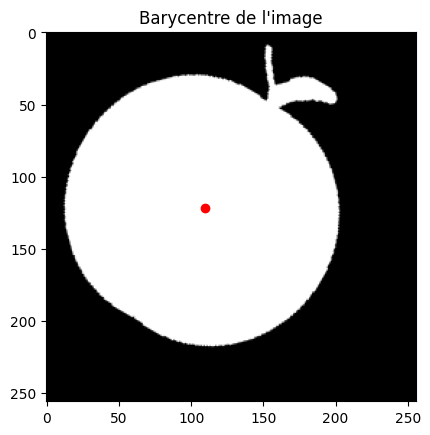

In [50]:
def calculer_moments_centres(image, moments):
    x_centre, y_centre = calculer_barycentre(moments)
    hauteur, largeur = image.shape
    moments_centres = {}

    # Boucle pour calculer les moments centrés
    for p in range(4):
        for q in range(4):
            M_pq = 0
            for y in range(hauteur):
                for x in range(largeur):
                    M_pq += ((x - x_centre) ** p) * ((y - y_centre) ** q) * image[y, x]
            moments_centres[(p, q)] = M_pq
    return moments_centres

# Exemple d'utilisation
moments_centres = calculer_moments_centres(image, moments)
print("Moments centrés :", moments_centres)

# Visualisation du barycentre
plt.imshow(image, cmap='gray')
plt.scatter(centroide[0], centroide[1], color='red')
plt.title('Barycentre de l\'image')
plt.show()


6. Développer invariants (7) de Hu

Moments centrés normalisés : {(0, 0): 1.0, (0, 1): -3.3258637016026116e-15, (0, 2): 0.0003165284790265845, (1, 0): -2.9244790598674974e-17, (1, 1): -3.9377995645676446e-06, (1, 2): 4.484757426239939e-07, (2, 0): 0.000318675411101392, (2, 1): -2.384381213632375e-07, (2, 2): 7.406820200565404e-08}


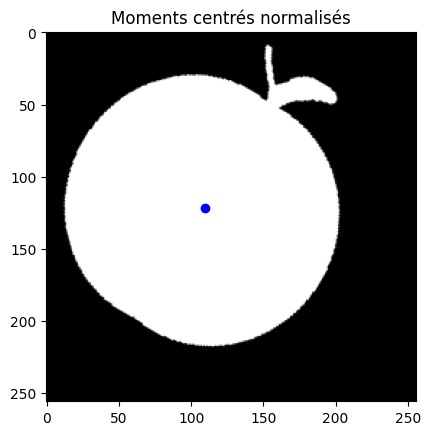

In [51]:
def calculer_moments_centres_normalises(moments_centres):
    moments_normalises = {}

    # Boucle pour normaliser les moments centrés
    for p in range(3):
        for q in range(3):
            mu_pq = moments_centres[(p, q)]
            mu_00 = moments_centres[(0, 0)]
            moments_normalises[(p, q)] = mu_pq / (mu_00 ** ((p + q) / 2 + 1))

    return moments_normalises

# Exemple d'utilisation
moments_normalises = calculer_moments_centres_normalises(moments_centres)
print("Moments centrés normalisés :", moments_normalises)

# Visualisation des moments normalisés
plt.imshow(image, cmap='gray')
plt.scatter(centroide[0], centroide[1], color='blue')
plt.title('Moments centrés normalisés')
plt.show()


In [58]:
def calculer_invariants_hu(moments_normalises):
    hu = np.zeros(7)

    # Calcul des invariants de Hu
    hu[0] = moments_normalises[(2, 0)] + moments_normalises[(0, 2)]
    hu[1] = (moments_normalises[(2, 0)] - moments_normalises[(0, 2)]) ** 2 + 4 * moments_normalises[(1, 1)] ** 2

    return hu

# Exemple d'utilisation
invariants_hu = calculer_invariants_hu(moments_normalises)
print("Invariants de Hu :", invariants_hu)


Invariants de Hu : [6.3520389e-04 6.6634379e-11 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00]


In [59]:
def etudier_transformations(image):
    transformations = {
        "Original": image,
        "Rotated": cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE),
        "Scaled": cv2.resize(image, None, fx=1.5, fy=1.5),
        "Translated": cv2.warpAffine(image, np.float32([[1, 0, 20], [0, 1, 20]]), (image.shape[1], image.shape[0])),
        "Noisy": image + np.random.normal(0, 10, image.shape).astype(np.uint8)
    }

    for nom, img in transformations.items():
        moments = calculer_moments_geometriques(img)
        centroide = calculer_barycentre(moments)
        moments_centres = calculer_moments_centres(img, moments)
        moments_normalises = calculer_moments_centres_normalises(moments_centres)
        invariants_hu = calculer_invariants_hu(moments_normalises)
        print(f"{nom} - Invariants de Hu :", invariants_hu)

# Exemple d'utilisation
etudier_transformations(image)


Original - Invariants de Hu : [6.3520389e-04 6.6634379e-11 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00]
Rotated - Invariants de Hu : [6.3520389e-04 6.6634379e-11 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00]
Scaled - Invariants de Hu : [6.35251964e-04 6.65722299e-11 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
Translated - Invariants de Hu : [6.3520389e-04 6.6634379e-11 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00]
Noisy - Invariants de Hu : [1.27237382e-03 1.72748181e-11 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]


In [40]:
def appliquer_transformations_et_calculer_moments(image):
    # Liste pour stocker les moments pour chaque transformation
    moments_list = []
    hu_invariants_list = []

    # Transformation 1: Rotation
    angle = 30  # Angle de rotation
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)  # Matrice de rotation
    rotated_image = cv2.warpAffine(image, M, (w, h))
    moments_rotated = calculer_moments_geometriques(rotated_image)
    moments_list.append(moments_rotated)
    hu_invariants_rotated = calculer_invariants_hu(calculer_moments_centres_normalises(moments_rotated))
    hu_invariants_list.append(hu_invariants_rotated)

    # Transformation 2: Mise à l'échelle
    scaled_image = cv2.resize(image, None, fx=1.5, fy=1.5)
    moments_scaled = calculer_moments_geometriques(scaled_image)
    moments_list.append(moments_scaled)
    hu_invariants_scaled = calculer_invariants_hu(calculer_moments_centres_normalises(moments_scaled))
    hu_invariants_list.append(hu_invariants_scaled)

    # Transformation 3: Translation
    M_translate = np.float32([[1, 0, 30], [0, 1, 30]])  # Translation de 30 pixels sur x et y
    translated_image = cv2.warpAffine(image, M_translate, (w, h))
    moments_translated = calculer_moments_geometriques(translated_image)
    moments_list.append(moments_translated)
    hu_invariants_translated = calculer_invariants_hu(calculer_moments_centres_normalises(moments_translated))
    hu_invariants_list.append(hu_invariants_translated)

    return moments_list, hu_invariants_list

# Exemple d'utilisation
moments_list, hu_invariants_list = appliquer_transformations_et_calculer_moments(image)


<ipython-input-27-56a93413e83e>:10: RuntimeWarning: overflow encountered in scalar add
  M_pq += (x ** p) * (y ** q) * image[y, x]


TypeError: range expected at least 1 argument, got 0

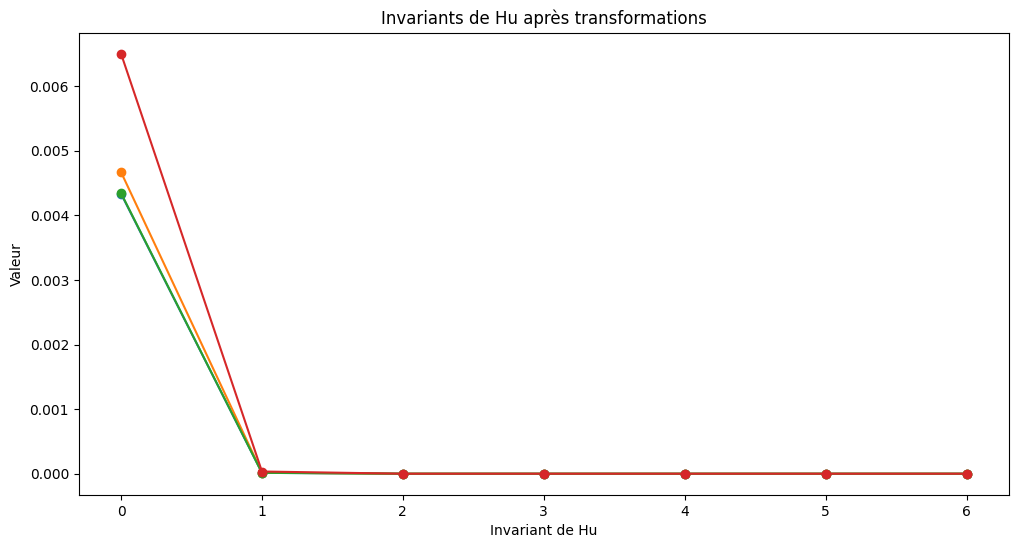

In [62]:
# Valeurs des invariants de Hu avant et après les transformations
invariants_original = calculer_invariants_hu(calculer_moments_centres_normalises(calculer_moments_geometriques(image)))

# Tracer les invariants de Hu
labels = ['Original', 'Rotated', 'Scaled', 'Translated']
hu_values = [invariants_original] + hu_invariants_list

# Créer le graphique
plt.figure(figsize=(12, 6))
for i, invariant in enumerate(hu_values):
    plt.plot(invariant, marker='o', label=f'{labels[i]}')

plt.title("Invariants de Hu après transformations")
plt.xlabel("Invariant de Hu")
plt.ylabel("Valeur")
plt.xticks(ticks=range(len(hu_values[0])), labels=[f'Hu{i+1}' for i in range()])
plt.legend()
plt.grid()
plt.show()


<ipython-input-27-56a93413e83e>:10: RuntimeWarning: overflow encountered in scalar add
  M_pq += (x ** p) * (y ** q) * image[y, x]


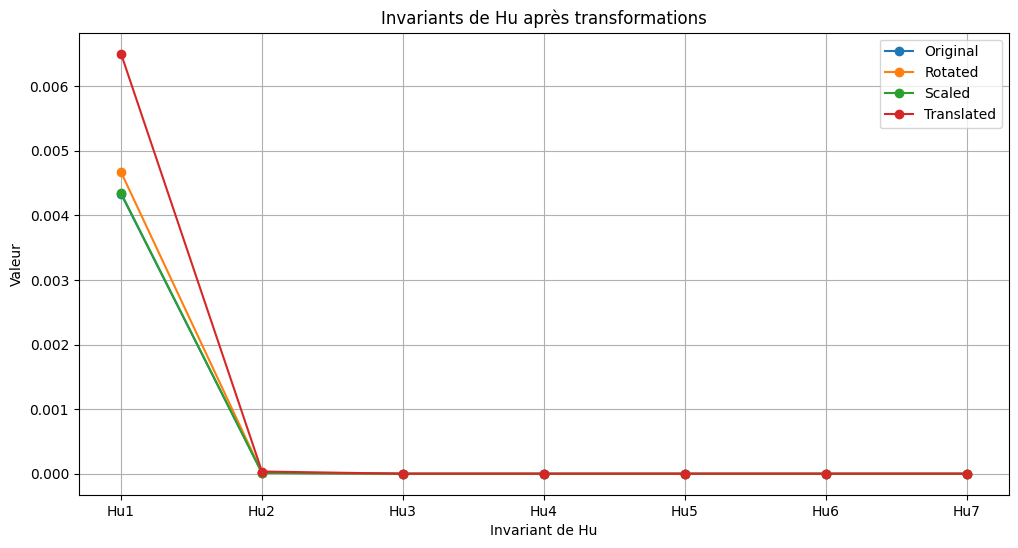

In [42]:
# Valeurs des invariants de Hu avant et après les transformations
invariants_original = calculer_invariants_hu(calculer_moments_centres_normalises(calculer_moments_geometriques(image)))

# Tracer les invariants de Hu
labels = ['Original', 'Rotated', 'Scaled', 'Translated']
hu_values = [invariants_original] + hu_invariants_list

# Créer le graphique
plt.figure(figsize=(12, 6))
for i, invariant in enumerate(hu_values):
    plt.plot(invariant, marker='o', label=f'{labels[i]}')

plt.title("Invariants de Hu après transformations")
plt.xlabel("Invariant de Hu")
plt.ylabel("Valeur")
plt.xticks(ticks=range(len(hu_values[0])), labels=[f'Hu{i+1}' for i in range(7)])
plt.legend()
plt.grid()
plt.show()


In [98]:
def transform_image(image, angle, scale):
    # Get the image center
    (h, w) = image.shape
    center = (w // 2, h // 2)

    # Rotation matrix
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)
    transformed_image = cv2.warpAffine(image, rotation_matrix, (w, h))

    return transformed_image

# Transformations
angle = 45  # Rotation angle in degrees
scale = 0.8  # Scaling factor

image = cv2.imread('/content/Image_A_250.png', cv2.IMREAD_GRAYSCALE)

rotated_image = transform_image(image, angle, scale)


In [99]:
def calculate_hu_moments(image):
    # Calculate moments
    moments = cv2.moments(image)
    hu_moments = cv2.HuMoments(moments).flatten()
    return hu_moments

# Calculate Hu moments
hu_original = calculate_hu_moments(image)
hu_rotated = calculate_hu_moments(rotated_image)


In [100]:
def calculer_barycentre(moments):
    M00 = moments[(0, 0)]
    M10 = moments[(1, 0)]
    M01 = moments[(0, 1)]

    # Calcul du barycentre
    x_centre = M10 / M00
    y_centre = M01 / M00
    return (x_centre, y_centre)

# Exemple d'utilisation
centroide = calculer_barycentre(moments)
print("Barycentre :", centroide)


Barycentre : (109.25625559885181, 121.3441785808384)


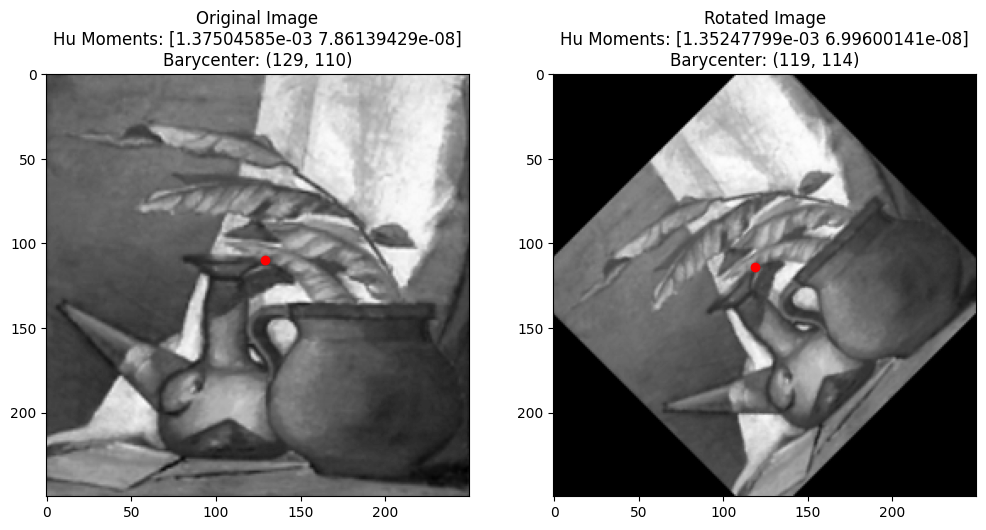

In [103]:
def calculate_barycenter(moments):
    # Calculate the barycenter (centroid)
    cx = int(moments['m10'] / moments['m00'])
    cy = int(moments['m01'] / moments['m00'])
    return (cx, cy)

# Barycenters
barycenter_original = calculate_barycenter(cv2.moments(image))
barycenter_rotated = calculate_barycenter(cv2.moments(rotated_image))

# Display images and Hu moments
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Original image
ax[0].imshow(image, cmap='gray')
ax[0].set_title(f'Original Image\nHu Moments: {hu_original[:2]}\nBarycenter: {barycenter_original}')
ax[0].scatter(*barycenter_original, color='red')  # Barycenter

# Rotated image
ax[1].imshow(rotated_image, cmap='gray')
ax[1].set_title(f'Rotated Image\nHu Moments: {hu_rotated[:2]}\nBarycenter: {barycenter_rotated}')
ax[1].scatter(*barycenter_rotated, color='red')  # Barycenter

plt.show()


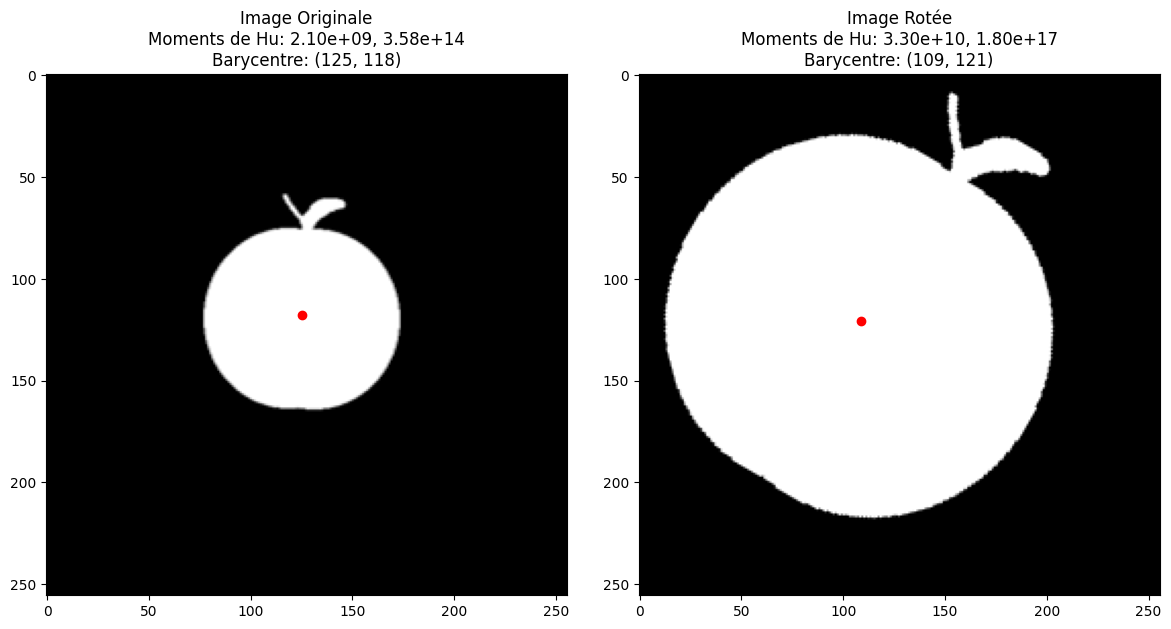

In [81]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculer_moments_geometriques(image):
    moments = cv2.moments(image)
    return moments

def calculer_moments_hu(moments):
    # Calcul des moments de Hu
    hu = np.zeros(7)
    hu[0] = moments['mu20'] + moments['mu02']
    hu[1] = (moments['mu20'] - moments['mu02']) ** 2 + 4 * moments['mu11'] ** 2
    return hu[:2]

def calculer_barycentre(moments):
    # Calculer le barycentre (centroïde)
    cx = int(moments['m10'] / moments['m00'])
    cy = int(moments['m01'] / moments['m00'])
    return (cx, cy)

# Chargement des images
original_image = cv2.imread('/content/apple_scale05.png', cv2.IMREAD_GRAYSCALE)
rotated_image = cv2.imread('/content/apple_30rotation.png', cv2.IMREAD_GRAYSCALE)

# Calcul des moments géométriques et des moments de Hu
moments_original = calculer_moments_geometriques(original_image)
moments_rotated = calculer_moments_geometriques(rotated_image)

hu_original = calculer_moments_hu(moments_original)
hu_rotated = calculer_moments_hu(moments_rotated)

# Calcul des barycentres
barycentre_original = calculer_barycentre(moments_original)
barycentre_rotated = calculer_barycentre(moments_rotated)

# Affichage des images et des moments de Hu
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Image originale
ax[0].imshow(original_image, cmap='gray')
ax[0].set_title(f'Image Originale\nMoments de Hu: {hu_original[0]:.2e}, {hu_original[1]:.2e}\nBarycentre: {barycentre_original}', fontsize=12)
ax[0].scatter(*barycentre_original, color='red')  # Barycentre

# Image tourné
ax[1].imshow(rotated_image, cmap='gray')
ax[1].set_title(f'Image Rotée\nMoments de Hu: {hu_rotated[0]:.2e}, {hu_rotated[1]:.2e}\nBarycentre: {barycentre_rotated}', fontsize=12)
ax[1].scatter(*barycentre_rotated, color='red')  # Barycentre

plt.tight_layout()
plt.show()
